# Understanding FTIR with Michelson interferometer | Theory + Codes explained💯

> FTIR basics

- toc: true 
- badges: true
- comments: true
- author: Mallikarju Sajjan
- categories: [jupyter, python, FTIR, Spectroscopy, basics]
- image: images/FTIR.png

If you have seen all those bulky FTIR instruments in the physics or chemistry lab during your science or engineering courses you might be wondering what technology lies inside those bulky and very expensive instruments right. when I say expensive i really mean it FTIR instruments are very expensive don't mess around and blew them away!!😅

The design of many interferometers used for infrared spectrometry in modern era is based on that of the two-beam interferometer originally designed by Michelson way back in 18th century. you might be wondering what is ‘spectroscopy’ and what is ‘infrared’, I know that feeling, this is what even I felt when I started researching about Spectroscopy.

Half the battle in learning any new field is understanding the jargon. To aid you in learning about Michelson interferometer, a number of the terms used in the field of infrared spectroscopy are defined below,

[Spectroscopy](https://en.wikipedia.org/wiki/Spectroscopy) — the study of the interaction of light with matter.

[Infrared Spectroscopy](https://en.wikipedia.org/wiki/Mid-infrared) — the study of the interaction of infrared light with
matter.

Mid-Infrared — light from 4000 to 400 wavenumbers (cm-1). or in wavelength 0.7um to 1000um.

Spectrum — a plot of measured light intensity versus some property of light
such as wavelength or wavenumber.

[Spectrometer](https://en.wikipedia.org/wiki/Spectrometer) — an instrument that measures a spectrum.

Infrared Spectrometer — an instrument that measures an infrared spectrum

[FTIR](https://en.wikipedia.org/wiki/Fourier-transform_infrared_spectroscopy) — Fourier Transform Infrared, a specific type of infrared spectrometer.

Hope now you are sounding good with mostly used jargons of spectroscopy in particularly infrared spectroscopy. coming back to our topic of interest, The Michelson interferometer is a device that can divide a beam of radiation into two paths and then recombine the two beams after a path difference has been introduced. A condition is thereby created under which interference between the beams can occur. The variation of intensity of the beam emerging from the interferometer is measured as a function of path difference by a detector. a simplest form of Michelson interferometer is as shown in the below figure.

![](img/FTIR_basics/FTIR.png)

>A simple representation of Michelson interferometer.

As shown in the figure it consists of a IR source at the left, Two mutually perpendicular placed mirrors, out of the two one mirror is static(F) and other one is movable(M) along the axis that is perpendicular to its plane. at the heart of the interferometer is a optical device called beam splitter and a detector at the bottom.

The light emitted from the source travels to the beam splitter and partially reflected to the fixed mirror and partially transmitted to movable mirror. this transmission and reflection depends on the characteristics of beam splitter for sake of simplicity let us assume that beam splitter splits the light perfectly that makes it half light transmitted and half a light is reflected. the transmitted and reflected light travels the respective path and get reflected upon hitting the mirrors and travels back towards the beam splitter. when the beams returns to the beam splitter they interfere (here we are considering property of wave which can be added or substracted based on their phase when they interfere) and are again partially reflected and partially transmitted. Because of effect of interference the intensity of each beam passing to the detector depends on the difference of path travelled by beams.

As the fixed mirror is always static and moving mirror moves toward and away from beam splitter. the path difference created will result in interferogram generation. this path difference is called as optical path difference denoted by δ. when the fixed and movable mirror are equidistance from the beam splitter path difference is Zero this is also called as Zero path difference(ZPD) the two beams are in prefect phase and undergo constructive interference ad the intensity of the beam passing to the detector is sum of the intensity of the two light passing to fixed and movable mirrors. based on the δ we can say either beam has undergone constructive or destructive interference.

if $δ = nλ$

Where δ = Optical path difference, λ = Wavelength, n = 0, 1, 2, … (any integer) the beam undergo constructive interference.

if $δ = (n + 1/2)λ$

Where δ = Optical path difference, λ = Wavelength, n = 0, 1, 2, … (any integer) the beam undergo destructive interference.

Since we got some understanding on the theory part of Michelson interferometer, you might be wondering how the initial setup of Michelson interferometer would have looked like!! well it was very huge instrument at the early stage of development here is the visualization of early Michelson interferogram device.

>18th century initial prototype of Michelson interferometer device.

![](img/FTIR_basics/img1.png)

> Albert Michelson was the first American to win a Nobel prize

![](img/FTIR_basics/img2.png)

Well with all respect to Michelson and his grate work in the physics, lets get our hand dirty with some codes to understand the working principle of Michelson interferogram even better. please find attached python code here. copy and paste it your fav editor and play around with variables to see different interferogram patterns

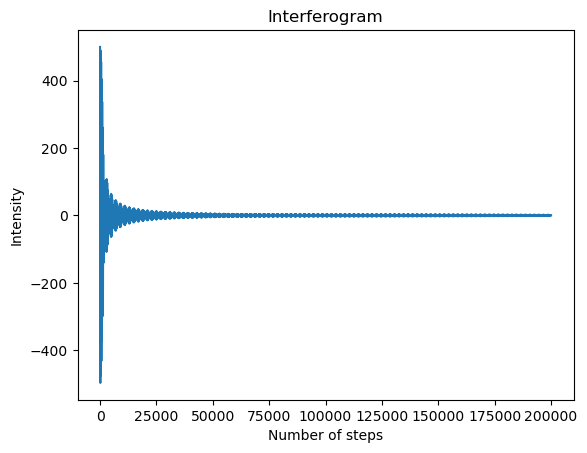

In [1]:
import numpy as np
import matplotlib.pyplot as plt
start_wn = 4000   # starting wavelength number
end_wn = 4500     # ending wavelength number
number_wn = end_wn-start_wn +1
wn_vector = np.arange(start_wn,end_wn+1,1)
wn_intensity = np.ones(number_wn)
# chose two wavenumbers and make their intensity 0.5
wn_1 = 4002
wn_2 = 4004
wn_intensity[wn_1-start_wn+1] = 0.5
wn_intensity[wn_2-start_wn+1] = 0.5
M1 = 10 # 20 cm distance of M1 from BS
start_M2 = 10 # 10 cm starting distance of M2 from BS
end_M2 = 10.2 # ending distance of M2 from BS
mirror_velocity = 0.1 # velocity of moving mirror, cm/s
sample_rate = 100000  # 1 MSPS
step_dist = mirror_velocity/sample_rate # # step of each movement
num_steps = (end_M2-start_M2)/step_dist # total number of steps
total_intf = []
for i in np.arange(num_steps):
    opd_vector = i*step_dist
    temp_intf = np.multiply(wn_intensity,np.cos(2*np.pi*opd_vector*wn_vector))
    total_intf.append(np.sum(temp_intf))
plt.figure(3)
plt.plot(total_intf)
plt.xlabel('Number of steps')
plt.ylabel('Intensity')
plt.title('Interferogram')
plt.show()

Here we are selecting the light source from 4000 to 4500 cm-1 wavenumbers. and to see the effect of absorption of the light by the sample placed in between source and beam splitter, we are reducing intensity of 4002 and 4004 wavenumbers as 0.5 and rest all beams intensity is set to 1. then we define the distance of fixed mirror at 10cm (M1) and distance of moving mirror between 10 and 10.2 cm. our moving mirror travels a distance of 0.2 cm. we also set other variables like mirror speed and sampling rate. please find the output of interferogram obtained from above code snippet.

Now we have got the interferogram signal, but its very difficult understand the interferogram generated. hence better and most practical way to understand the interferogram is generation of fringe patterns. we will use [lightpipes](https://github.com/opticspy/lightpipes) package to generate fringe pattern by changing the distance of moving mirror.

Note: Open up a [jupyter notebook](https://jupyter.org/) and paste the below code to run it as we are using ipywidget to visualize the result

In [5]:
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
from LightPipes import *
import math
import matplotlib.image as mpimg
# wavelength=632.8*nm #wavelength of HeNe laser
# size=10*mm # size of the grid
# N=300 # number (NxN) of grid pixels
# R=3*mm # laser beam radius
# z1=8*cm # length of arm 1
# z2=7*cm # length of arm 2
# z3=3*cm # distance laser to beamsplitter
# z4=5*cm # distance beamsplitter to screen
# Rbs=0.5 # reflection beam splitter
# tx=1*mrad; ty=0.0*mrad # tilt of mirror 1
# f=50*cm # focal length of positive lens
# fig = plt.figure()
# ax = fig.add_subplot(111)
def MI(wavelength,size,N,R,z1,z2,z3,z4,Rbs,tx,ty,f):
    
    z1 = z1*cm
    z2 = z2 *cm
    z3 = z3*cm
    z4 = z4*cm
    
    #Generate a weak converging laser beam using a weak positive lens:
    F=Begin(size*mm,wavelength*nm,int(N))
    #F=GaussBeam(F, R)
    #F=GaussHermite(F,R,0,0,1) #new style
    #F=GaussHermite(F,R) #new style
    F=GaussHermite(0,0,1,R*mm,F) #old style
    F=Lens(f*cm,0,0,F)
#Propagate to the beamsplitter:
    F=Forvard(z3,F)
#Split the beam and propagate to mirror #2:
    F2=IntAttenuator(1-Rbs,F)
    F2=Forvard(z2,F2)
#Introduce tilt and propagate back to the beamsplitter:
    F2=Tilt(tx*mrad,ty*mrad,F2)
    F2=Forvard(z2,F2)
    F2=IntAttenuator(Rbs,F2)
#Split off the second beam and propagate to- and back from the mirror #1:
    F10=IntAttenuator(Rbs,F)
    F1=Forvard(z1*2,F10)
    F1=IntAttenuator(1-Rbs,F1)
#Recombine the two beams and propagate to the screen:
    F=BeamMix(F1,F2)
    F=Forvard(z4,F)
    I=Intensity(1,F)
    
# ax.format_coord = lambda x, y: 'x = %2.2f mm, y = %2.2f mm, Intensity = %2.4f a.u.' % ((-size/2 + x*size/N)/mm, (-size/2 + y*size/N)/mm, I[int(x)][int(y)])
# plt.show()
plt.imshow(MI,cmap='jet'); plt.axis('off');plt.title('intensity pattern')
plt.show()
w=interact(MI,
           wavelength=widgets.FloatSlider(description='wavelength of HeNe laser [nm]',min=400,max=1500,step=1,value=632.0,continuous_update=False,readout_format='.3f'),
           size=widgets.FloatSlider(description='size of the grid [mm] ',min=10,max=50,step=10,value=10,continuous_update=False),
           N=widgets.FloatSlider(description='number (NxN) of grid pixels  ',min=1,max=500,step=10,value=300,continuous_update=False),
           R=widgets.FloatSlider(description='Laser beam Radius [mm]  ',min=1,max=5,step=0.1,value=3,continuous_update=False),
           z1=widgets.FloatSlider(description='Distance between M1(fixed) and Beam spiltter [cm] ',min=3,max=12,step=0.1,value=8,continuous_update=False),
           z2=widgets.FloatSlider(description='Distance between M2(Moving) and Beam spiltter [cm]  ',min=3,max=12,step=0.1,value=8,continuous_update=False),
           z3=widgets.FloatSlider(description='Distance between Laser and Beam spiltter [cm]  ',min=3,max=10,step=0.1,value=3,continuous_update=False),
           z4=widgets.FloatSlider(description='Distance between Screen and Beam spiltter [cm]  ',min=3,max=10,step=0.1,value=3,continuous_update=False),
           Rbs=widgets.FloatSlider(description='Reflection coeff of beam splitter [%]  ',min=0.1,max=1,step=0.1,value=0.5,continuous_update=False),
           tx=widgets.FloatSlider(description='M2 tilt in x direction [0 to 1]  ',min=0,max=1,step=0.1,value=0,continuous_update=False),
           ty=widgets.FloatSlider(description='M2 tilt in y direction [0 to 1]  ',min=0,max=1,step=0.1,value=0,continuous_update=False),
           f=widgets.FloatSlider(description='focal length of positive lens [cm]  ',min=10,max=100,step=5,value=50,continuous_update=False),
          );

![](img/FTIR_basics/out1.png)

You will get this widget where you can play around the settings of mirror movement to visualize the fringe pattern.

Here is some of the fringe pattern results when we move the moving mirror.

![](img/FTIR_basics/out2.png)

That's a nice view of fringe pattern isn't it. well hope you have enjoyed the theory and some code practice of most fascinating Michelson interferometer.

Hope u enjoyed the information…. happy reading….. And, Don’t forget to give your 👏 !